In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
#loading the data
df_train = pd.read_csv('train_revised.csv')

In [3]:

df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


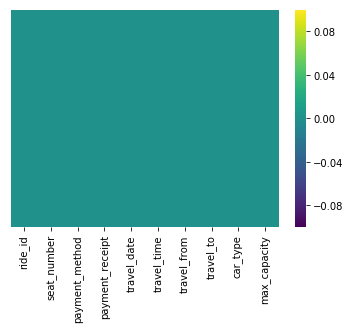

In [4]:
#visualizing the data to detect missing values
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='viridis')

In [5]:
#twitching the data to make more meaning.
#convert travel_time to minutes
df_train["travel_time"] = df_train["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [6]:
df_train['travel_time'].head()

0    435
1    432
2    425
3    430
4    432
Name: travel_time, dtype: int64

In [7]:
#replacing the cartype with boolean values
df_train['car_type'] = pd.get_dummies(df_train['car_type'],drop_first=True)
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,435,Migori,Nairobi,0,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,432,Migori,Nairobi,0,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,425,Keroka,Nairobi,0,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,430,Homa Bay,Nairobi,0,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,432,Migori,Nairobi,0,49


In [8]:
#converting the date to the day of the week
df_train['travel_date'] = pd.to_datetime(df_train['travel_date'],infer_datetime_format=False)
df_train['travel_date'] = df_train['travel_date'].dt.dayofweek 
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,1,435,Migori,Nairobi,0,49
1,5437,14A,Mpesa,TIHLBUSGTE,6,432,Migori,Nairobi,0,49
2,5710,8B,Mpesa,EQX8Q5G19O,6,425,Keroka,Nairobi,0,49
3,5777,19A,Mpesa,SGP18CL0ME,0,430,Homa Bay,Nairobi,0,49
4,5778,11A,Mpesa,BM97HFRGL9,0,432,Migori,Nairobi,0,49


In [9]:
#Travel_to to boolean values
df_train['travel_to'] = pd.get_dummies(df_train['travel_to'])
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,1,435,Migori,1,0,49
1,5437,14A,Mpesa,TIHLBUSGTE,6,432,Migori,1,0,49
2,5710,8B,Mpesa,EQX8Q5G19O,6,425,Keroka,1,0,49
3,5777,19A,Mpesa,SGP18CL0ME,0,430,Homa Bay,1,0,49
4,5778,11A,Mpesa,BM97HFRGL9,0,432,Migori,1,0,49


In [10]:
df_train["travel_from"] = pd.Categorical(df_train["travel_from"])
travel_from_categories = df_train.travel_from.cat.categories
df_train["travel_from"] = df_train.travel_from.cat.codes
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,1,435,9,1,0,49
1,5437,14A,Mpesa,TIHLBUSGTE,6,432,9,1,0,49
2,5710,8B,Mpesa,EQX8Q5G19O,6,425,4,1,0,49
3,5777,19A,Mpesa,SGP18CL0ME,0,430,1,1,0,49
4,5778,11A,Mpesa,BM97HFRGL9,0,432,9,1,0,49


In [11]:
df_train.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [12]:
columns = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt']
z = df_train.drop(columns, inplace=True, axis=1)

In [13]:
df_train.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1,435,9,1,0,49
1,6,432,9,1,0,49
2,6,425,4,1,0,49
3,0,430,1,1,0,49
4,0,432,9,1,0,49


# training!

In [14]:
x = df_train.drop(["travel_from"], axis=1)
y = df_train.travel_from

In [15]:
model = RandomForestRegressor(n_estimators=10, criterion="mae", n_jobs=1,min_samples_split=2, min_samples_leaf=1)


In [16]:
model.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:

pred_train = model.predict(x)
print (mean_absolute_error(pred_train,y))

1.9197860393068062


# predicting 

In [18]:
#loading test data
df_test = pd.read_csv('test_questions.csv')

In [19]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


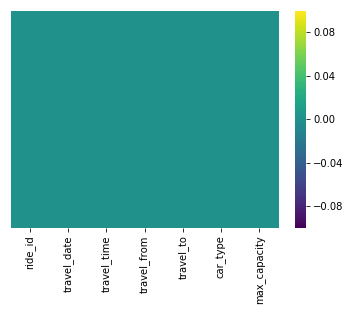

In [20]:
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='viridis')

In [21]:
# twitch the data
#time to minutes
df_test['travel_time'] = df_test['travel_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
# date to day of the week
df_test['travel_date'] = pd.to_datetime(df_test['travel_date'],infer_datetime_format=False)
df_test['travel_date'] = df_test['travel_date'].dt.dayofweek 
#car-type to boolean values
df_test['car_type'] = pd.get_dummies(df_test['car_type'],drop_first=True)
#
df_test['travel_from'] = pd.Categorical(df_test['travel_from'])
travel_from_categories = df_test.travel_from.cat.categories
df_test['travel_from'] = df_test.travel_from.cat.codes
#view
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,0,426,5,Nairobi,0,49
1,256,6,668,5,Nairobi,1,11
2,275,4,300,5,Nairobi,1,11
3,285,4,550,5,Nairobi,1,11
4,286,4,560,5,Nairobi,1,11


In [22]:
#Travel_to to boolean values
df_test['travel_to'] = pd.get_dummies(df_test['travel_to'])
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,0,426,5,1,0,49
1,256,6,668,5,1,1,11
2,275,4,300,5,1,1,11
3,285,4,550,5,1,1,11
4,286,4,560,5,1,1,11


# predicting

In [23]:
x_test = df_test.drop(['ride_id','travel_to'], axis=1)
test_pred = model.predict(x_test)

In [24]:
q = {'ride_id': df_test["ride_id"], 'number_of_ticket': test_pred}
df_pred = pd.DataFrame(data=q)
df_pred = df_pred[['ride_id','number_of_ticket']]

In [25]:
df_pred

,ride_id,number_of_ticket
0,247,7.0
1,256,7.0
2,275,6.8
3,285,7.0
4,286,7.0
5,287,7.0
6,288,7.0
7,292,7.2
8,298,7.0
9,302,7.0


In [26]:
#saving as csv
df_pred.to_csv('preds.csv') 